In [ ]:
import numpy as np
from sklearn import preprocessing, model_selection, neighbors
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from collections import Counter
from math import sqrt
import random

In [ ]:
style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv('sample_data/breast-cancer-wisconsin.csv')

In [ ]:
df.replace('?', -99999, inplace=True)

In [ ]:
df.drop(['id'], axis=1, inplace=True)

In [ ]:
df.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
x = np.array(df.drop(['class'], axis=1))
y = np.array(df['class'])

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, test_size=0.2)

In [ ]:
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
accuracy = clf.score(x_test,y_test)
accuracy

0.9571428571428572

# Crear mi K Nearest

In [ ]:
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}

In [ ]:
new_features=[5,7]

In [ ]:
def k_nearest_neighbors(data,predict, k=3):
  if len(data) >=k:
    warnings.warn('K is set to a value less than total voting groups!')
  distances=[]
  for group in data:
    for features in data[group]:
      euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
      distances.append([euclidean_distance,group])
  votes = [i[1] for i in sorted(distances)[:k]]
  vote_result = Counter(votes).most_common(1)[0][0]
  confidence = Counter(votes).most_common(1)[0][1] / k
  return vote_result,confidence

In [ ]:
result = k_nearest_neighbors(dataset,new_features)

In [ ]:
result

('r', 1.0)

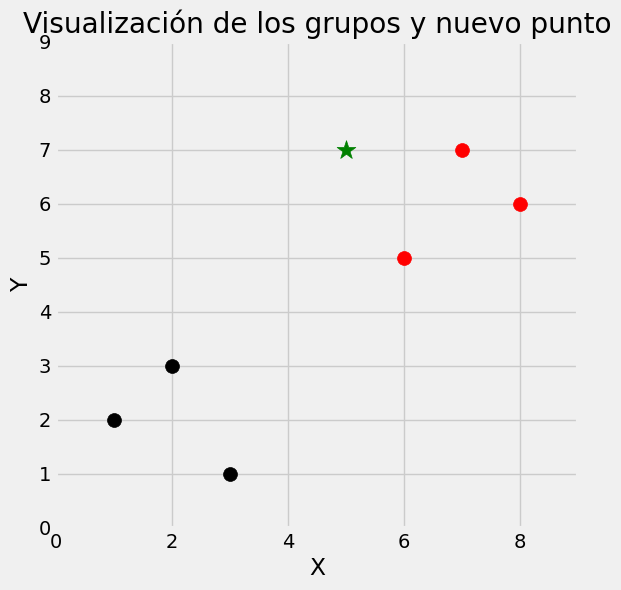

In [ ]:
# Colores por clase
colors = {'k': 'black', 'r': 'red'}

# Tamaño de la figura
plt.figure(figsize=(6, 6))

# Dibujar puntos de cada grupo
for label in dataset:
    for point in dataset[label]:
        plt.scatter(point[0], point[1], s=100, color=colors[label])

# Dibujar el nuevo punto (opcional)
plt.scatter(new_features[0], new_features[1], s=200, color='green', marker='*')

plt.grid(True)
plt.title('Visualización de los grupos y nuevo punto')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, 9)
plt.ylim(0, 9)
plt.show()

# APPLY OUR K nearest neighbors

In [ ]:
full_data = df.astype(float).values.tolist()

In [ ]:
random.shuffle(full_data)

In [ ]:
test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [ ]:
for i in train_data:
  train_set[i[-1]].append(i[:-1])

In [ ]:
for i in test_data:
  test_set[i[-1]].append(i[:-1])

In [ ]:
correct = 0
total = 0

In [ ]:
for group in test_set:
  for data in test_set[group]:
    vote,confidence = k_nearest_neighbors(train_set,data,k=50)
    if group == vote:
      correct += 1
    else:
      print(confidence)
    total += 1

0.82
0.62
0.78
0.8
0.52


In [ ]:
print('Accuracy', correct/total)

Accuracy 0.9694244604316546


Confidence es distinto acccuracy.